In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
az.style.use('arviz-white')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [uk]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 29 seconds.
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A109E33880>],
      dtype=object)

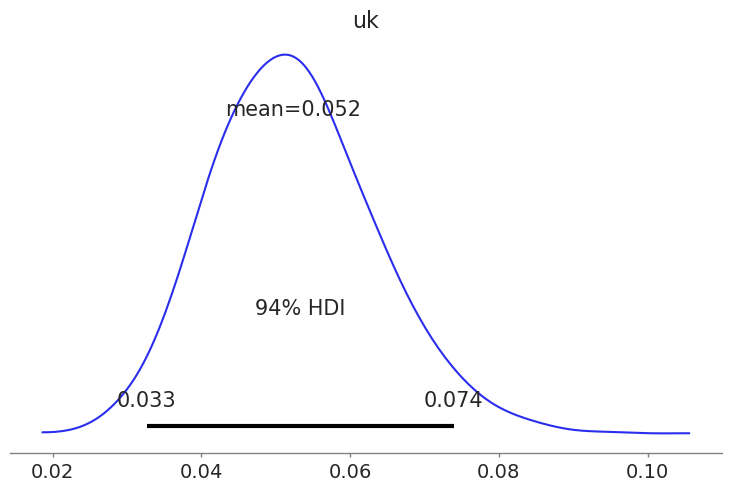

In [15]:
#  Find proportion of google earth entries in UK. Ans: 0.01%
observations = [0]*380+ [1]*20
uk_obs = sum(observations)
total_obs = len(observations)
#  Model
with pm.Model() as the_model:
    #  Prior.
	p_uk = pm.Uniform("uk",0,1)
    #  Likelihood.
	uk = pm.Binomial("likelihood", p=p_uk,n=total_obs, observed=uk_obs)
    #  MCMC.
	trace_5_obs = pm.sample(10000,chains=2)
#  Posterior.
az.plot_posterior(trace_5_obs)
#  Posterior output:
#  mean: 5.2%.
#  94% HDI: 3.3%-7.4%.